## Hypothesis testing
Reference: [STAT 104, Harvard](http://isites.harvard.edu/icb/icb.do?keyword=k62504)

### Definitions
* Goal of **statistical inference** is to draw some conclusions about a population based on information from a sample
* **Hypothesis testing** is an approach to statistical inference
* **Null hypothesis ($H_0$)**: $H_0$ is the claim that we wish to find evidence against. 
  * $H_0$ assumes a distribution for the population that reflects no change from the status quo. 
  * If the null hypothesis is true, any discrepancy between the observed data and the hypothesized distribution is due only to chance variation.
* **Alternative hypothesis ($H_A$)**: $H_A$ is the claim that we suspect may be true instead of $H_0$. 
  * $H_A$ states that there is a real difference between the distribution of the observed data and the null-hypothesized distribution. 
  * An observed discrepancy between the observed data and the null-hypothesis distribution is not due to chance variation.
* **Test statistic**: The test statistic measures the difference between the observed data and what is expected given $H_0$ is true. 
  * It answers the question, “How many standard deviations from the hypothesized value is the observed sample value?”
  * $Test\ statistic = \frac{Observed\ statistic - Its\ expected\ value}{Standard\ deviation\ of\ statisctic}$.
* **p-value**: The p-value is the probability of getting an outcome as extreme or more extreme than the observed outcome assuming the $H_0$ is true.
  * The smaller the p-value, the stronger the evidence against $H_0$.

### Hypothesis testing process
1. State $H_0$ and $H_A$ and specify the significance level $\alpha$
2. Collect the data
3. Calculate the value of the test statistic
4. Compute the p-value
5. Compare the p-value to the significance level $\alpha$ (e.g., $\alpha$ = 0.05) and draw a conclusion: 
 * If p-value < $\alpha$, reject $H_0$ in favor of $H_A$
 * If p-value > $\alpha$, data do not provide sufficient evidence to reject $H_0$

In [1]:
# Load the relevant libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

## Example: Inference for population mean
This example is taken from [Khan Academy](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/hypothesis-testing-and-p-values). <br\>
A neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit dose of the drug, subjecting each to neurologist stimulus, and reconrding its response time. The neurologist knows that the mean response time for rats not injected with the drug is 1.2 seconds. The mean of the 100 injected rats' response times is 1.05 seconds with a sample standard deviation of 0.5 seconds. Do you think that the drug has an effect on response time?

$H_0$: $\mu = 1.2$ seconds. i.e. The drug has no effect. 

$H_A$: $\mu \neq 1.2$ seconds. i.e. The drug has an efect. 

Assume, the significance level $\alpha = 0.05$ 

Assume that the (sample) mean response time has a normal distribution.

\begin{equation*}
\bar{X} 
\sim \mathcal{N}\left(\mu_\bar{X}=\mu, \sigma_\bar{X}^2=\left(\frac{\sigma}{\sqrt{n}}\right)^2\right) 
= \mathcal{N}\left(\mu_\bar{X}=1.2, \sigma_\bar{X}^2=\left(\frac{0.5}{\sqrt{100}}\right)^2\right) 
\end{equation*}

Test statistic reduces to the **z-statistic** under the assumption of normal distribution. 

\begin{equation*}
z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} = \frac{1.05-1.2}{0.05} = -3
\end{equation*}

p-value = 0.003 # See below.

p-value = 0.003
p-value < alpha ==> Reject $H_0$ in favor of $H_A$.


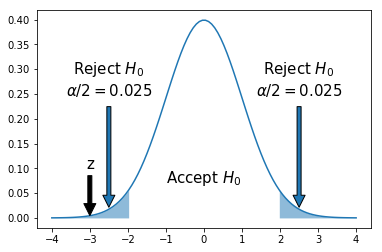

In [2]:
alpha = 0.05
z = (1.05-1.2)/0.05
p_value = st.norm.cdf(-abs(z))*2 # two-sided hypothesis test
print ('p-value = {:.3f}'.format(p_value))
print ('p-value < alpha ==> Reject $H_0$ in favor of $H_A$.')

mu, sigma = 0, 1
qt = st.norm.ppf(alpha/2, loc=mu, scale=sigma)

x = np.linspace(-4+mu,4+mu,100)

iq = st.norm(mu, sigma)
plt.plot(x,iq.pdf(x))

px = x[np.logical_and(x >= mu-4, x <= qt)]
plt.fill_between(px, iq.pdf(px), alpha=0.5, linewidth=0, color='#1f77b4')
px = x[np.logical_and(x >= -qt, x <= mu+4)]
plt.fill_between(px, iq.pdf(px), alpha=0.5, linewidth=0, color='#1f77b4')

plt.annotate('z', xy=(z, 0), xytext=(z, 0.1), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.text(0, 0.08, 'Accept $H_0$', fontsize=15, horizontalalignment='center', verticalalignment='center',)
plt.annotate(r'Reject $H_0$' '\n' r'$\alpha/2=0.025$', xy=(2.5, 0.01), xytext=(2.5, 0.25), fontsize=15, arrowprops=dict(facecolor='#1f77b4', shrink=0.05), horizontalalignment='center')
plt.annotate(r'Reject $H_0$' '\n' r'$\alpha/2=0.025$', xy=(-2.5, 0.01), xytext=(-2.5, 0.25), fontsize=15, arrowprops=dict(facecolor='#1f77b4', shrink=0.05), horizontalalignment='center');

## Hypothesis testing and confusion matrix

### Confusion Matrix:
<table>
  <caption align="bottom">We define "rejecting Null" as a positive prediction.</caption>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Decision based on sample</td>
  </tr>
  <tr>
    <td style="font-weight:bold">Reject $H_0$</td>
    <td style="font-weight:bold">Accept $H_0$</td>
  </tr>
  <tr>
    <td rowspan="2">Truth about <BR> the population</td>
    <td style="font-weight:bold">$H_0$ False</td>
    <td>True Positive</td>
    <td>False Negative (Type II)</td>
  </tr>
  <tr>
    <td style="font-weight:bold">$H_0$ True</td>
    <td>False Positive (Type I)</td>
    <td>True Negative</td>
  </tr>
</table>


* **Type I error**: 
 * Rejecting $H_0$ when it is true
 * P(Type I error) = $\alpha = \frac{FP}{FP+TN}$
 
 
* **Type II error**: 
 * Not rejecting $H_0$ when it is false
 * P(Type II error) = $\beta = \frac{FN}{TP+FN}$
 

* **Power**: 
 * Probability of rejecting $H_0$ when it is false
 * $Power = \frac{TP}{TP+FN} = 1-\beta$
 

* **Precision-Recall**:
 * $Precision = \frac{TP}{TP+FP}$
 * $Recall = \frac{TP}{TP+FN}$ 

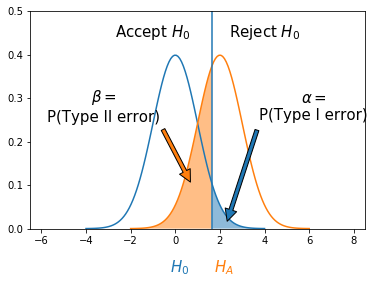

In [3]:
def plot_shaded_normal(mu, var, qt):
    xbuf = 4
    sigma = np.sqrt(var)
    iq = st.norm(mu, sigma)
    x = np.linspace(-xbuf+mu,xbuf+mu,100)
    
    if qt>mu:
        px = x[np.logical_and(x >= qt, x <= mu+xbuf)]
        label=r'$\alpha$ = P(Type I error)'
    else:
        px = x[np.logical_and(x >= mu-xbuf, x <= qt)]
        label=r'$\beta$ = P(Type II error)'
    
    plt.plot(x,iq.pdf(x));
    plt.fill_between(px, iq.pdf(px), alpha=0.5, linewidth=0, label=label)

mu, var = 0, 1
alpha = st.norm.ppf(.95, loc=mu, scale=np.sqrt(var))
plot_shaded_normal(mu, var, alpha)

mu, var = 2, 1 
beta = st.norm.ppf(.3628, loc=mu, scale=np.sqrt(var))
plot_shaded_normal(mu, var, beta)
plt.axvline(x=alpha)
plt.xlim(-6.5, 8.5)
plt.ylim(0,0.5)

#plt.legend(loc='center right', prop={'size':12})
plt.annotate(r'$H_0$', xy=(0, 0), xytext=(-0.25, -0.1), fontsize=15, color='#1f77b4')#, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(r'$H_A$', xy=(2, 0), xytext=(2-0.25, -0.1), fontsize=15, color='#ff7f0e')

plt.text(-1, 0.45, 'Accept $H_0$', fontsize=15, horizontalalignment='center', 
         verticalalignment='center',)
plt.text(4, 0.45, 'Reject $H_0$', fontsize=15, horizontalalignment='center', 
         verticalalignment='center',)
plt.annotate(r'$\alpha=$' '\n' 'P(Type I error)', xy=(2.25, 0.005), xytext=(6.2, 0.25), 
             fontsize=15, arrowprops=dict(facecolor='#1f77b4', shrink=0.05), 
             horizontalalignment='center');
plt.annotate(r'$\beta=$' '\n' 'P(Type II error)', xy=(0.75, 0.1), xytext=(-3.2, 0.25), 
             fontsize=15, arrowprops=dict(facecolor='#ff7f0e', shrink=0.05), 
             horizontalalignment='center');

## t-test
* In the above discussion, we assumed that the true population standard deviation $\sigma$ is known. This doesn’t often happen in real life. So, instead, we use our **sample-based estimate of the standard deviation** ($s$). 

\begin{equation*}
s^2 = \frac{1}{N-1}\sum_{i=1}^n (X_i-\bar{X})^2
\end{equation*}

* The resulting **test statistic** $t = (\bar{X}-\mu) \big/ \frac{s}{\sqrt{n}}$ follows a **t-distribution**, rather than a normal distribution.
* **p-values** are computed by comparing the test statistic with a t-distribution with degrees of freedom, **$df=n-1$**.

### t-distribution
* More spread out than the normal distribution
* As the degrees of freedom increases, t-distributions look more like a standard normal distribution

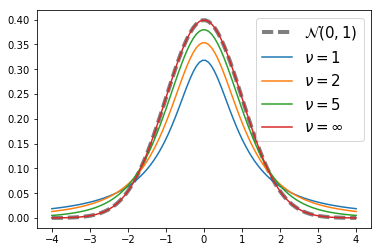

In [4]:
x = np.linspace(-4,4,100)

iq = st.norm(0, 1)
plt.plot(x,iq.pdf(x), color='black', label=r'$\mathcal{N}(0,1)$', lw=4, linestyle='--', alpha=0.5)

nus = [1,2,5,10000]
nu_labels = ['1', '2', '5', u'\u221E']
for i,nu in enumerate(nus):
    iq = st.t(df=nu)
    plt.plot(x,iq.pdf(x), label=r'$\nu=$' + nu_labels[i])
    
plt.legend(fontsize=15)

### Example: Inference for population proportions
This example is taken from [STAT 111, Harvard](http://isites.harvard.edu/icb/icb.do?keyword=k101665). <br\>
Dell USA has promised its distributors and customers that no more than 20% of Dell laptop
computers will fail in the first year (failure of the power supply or disk drive, etc.). Of the one thousand Harvard students who purchased a new Dell laptop this year, 225 have experienced a failure of their computer. <br\>

1. What are: (A) the population parameter of interest, (B) the hypothesized value for this
parameter, (C) the estimator (aka statistic) to estimate the parameter, and (D) the estimate of this statistic from the sample?
2. Find the 95% confidence interval for this data.
3. Run a test of hypothesis to determine if the Dell USA promise is accurate.

#### Answer:

1. 
    1. $p$ = proportion of laptops that fail in the first year.
    2. $p_0$ = 0.2, Our Null Hypothesis
    3. $\hat{p}$ = sample proportion of laptops that fail in the first year
    4. Estimate of $\hat{p}$ = 225/1000 = 0.225

2. 
Let X be the count of laptops that fail in the first year out of a fixed n (n = 1000 here). We have 

$X \sim Binomial(n,p)$ 

$\hat{p}$ = X / n 

Recall that for Binomial, $\mu_X=np$, $\sigma_X=\sqrt{np(1-p)}$ 

Thus $\mu_{\hat{p}} = p$, $\sigma_{\hat{p}} = \sqrt{\frac{\sigma_X^2}{n^2}} = \sqrt{\frac{p(1-p)}{n}}$ 

$\hat{p}$ can be approximated by the following Normal distribution.

\begin{equation*}
\hat{p}
\sim \mathcal{N}\left(\mu_\hat{p}=p, \sigma_\hat{p}^2=\frac{p(1-p)}{n}\right) 
= \mathcal{N}\left(\mu_\hat{p}=0.225, \sigma_\hat{p}^2=\frac{0.225(1-0.225)}{1000}\right) 
\end{equation*} 

The confidence interval for p is given by

\begin{equation*}
\hat{p} \pm z^*\sqrt{\frac{p(1-p)}{n}}
\end{equation*}

In [5]:
# 95% confidence interval can be obtained as follows
p_hat = 0.225
p_hat + st.norm.ppf(q=[0.025,0.975])*np.sqrt(0.225*(1-0.225)/1000)

array([ 0.19911845,  0.25088155])

\3. 

$H_0$: $p_0$ = 0.2, Null hypothesis 

$H_A$: $p$ > 0.2, Alternative hypothesis 

$\alpha = 0.05$, Significance level 

z-statistic:

$z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

In [6]:
p_0, n = 0.2, 1000
z = (p_hat - p_0)/np.sqrt(p_0*(1-p_0)/n)

p_value = 1 - st.norm.cdf(abs(z)) # one-sided hypothesis test
print ('p-value = {:.3f}'.format(p_value))
print ('p-value < alpha ==> Reject $H_0$ in favor of $H_A$.')

p-value = 0.024
p-value < alpha ==> Reject $H_0$ in favor of $H_A$.
